In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#loading the required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

**About Dataset**

**Context** :
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

**Content** :
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

*   Pregnancies: Number of times pregnant
*   Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
*   BloodPressure: Diastolic blood pressure (mm Hg)
*   SkinThickness: Triceps skin fold thickness (mm)
*   Insulin: 2-Hour serum insulin (mu U/ml)
*   BMI: Body mass index (weight in kg/(height in m)^2
*   DiabetesPedigreeFunction: Diabetes pedigree function
*   Age: Age (years)
*   Outcome: Class variable (0 or 1)


Data Loading

In [3]:
df=pd.read_csv('/content/drive/MyDrive/Data Analytics Python Projects/Diabetic_analysis/diabetes.csv')

In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Statistical Measure of Diabetic patients Data

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Total number of zero value as minimum value of all the feature

In [16]:
print(df[df["Pregnancies"]==0].shape[0])
print(df[df["Glucose"]==0].shape[0])
print(df[df["BloodPressure"]==0].shape[0])
print(df[df["SkinThickness"]==0].shape[0])
print(df[df["Insulin"]==0].shape[0])
print(df[df["BMI"]==0].shape[0])
print(df[df["DiabetesPedigreeFunction"]==0].shape[0])
print(df[df["Age"]==0].shape[0])

111
5
35
227
374
11
0
0


# Data Analysis

Checking is there any null value or not

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

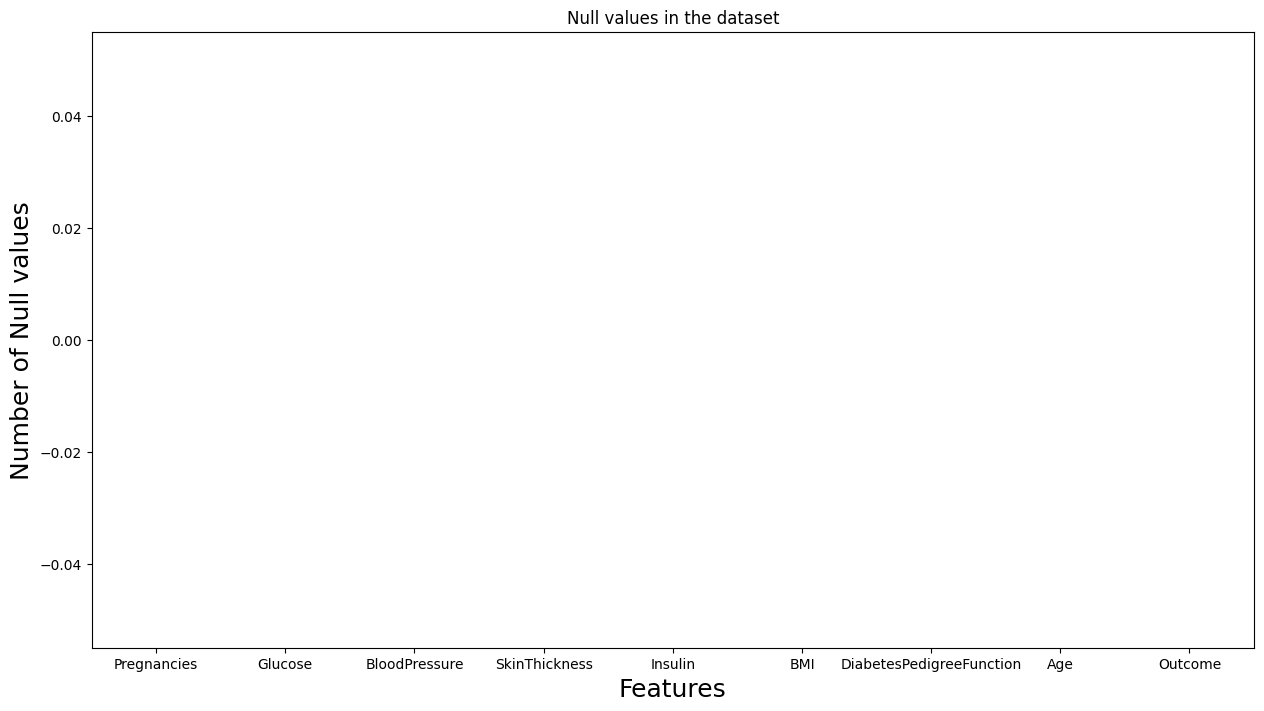

In [11]:
null_value = df.isnull()
plt.figure(figsize = (15,8))
sns.barplot(data=null_value)
plt.xlabel('Features',fontsize=18)
plt.ylabel('Number of Null values',fontsize=18)
plt.title("Null values in the dataset")
df.isnull().sum()

**Insights:**
1.No null value is depicted

Checking Duplicate

In [28]:
df.duplicated().sum()

0

**Insights:**
No duplicate

Total number of diabetic and non-diabetic patients

0    500
1    268
Name: Outcome, dtype: int64


Text(0, 0.5, 'Count')

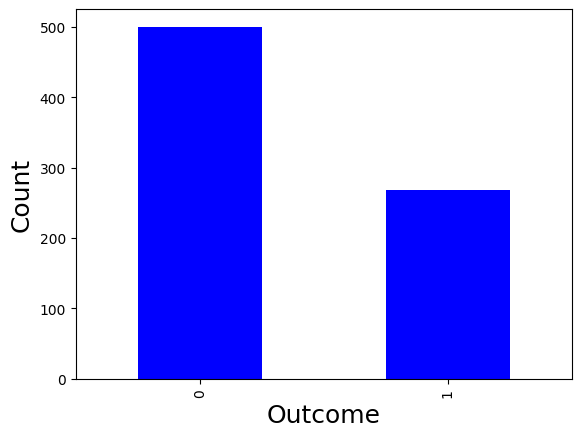

In [37]:
df['Outcome'].value_counts().plot(kind = 'bar', color = 'blue')
print(df.Outcome.value_counts())
plt.xlabel('Outcome',fontsize=18)
plt.ylabel('Count',fontsize=18)


**Insights:**


1.   0-> Non-Diabetic Patients(Total 500)
2.   1-> Diabetic Patients(Total 268)



Box plot for checking outliers

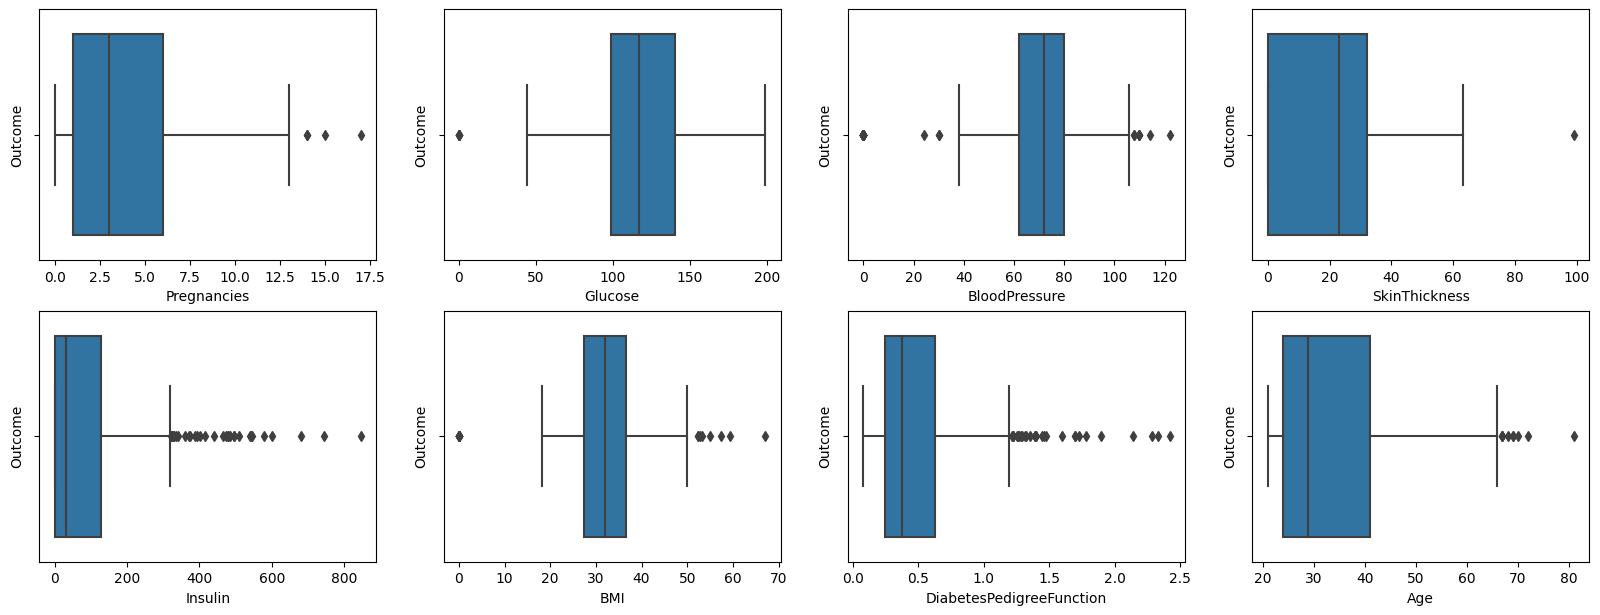

In [23]:
plotnumber=1
featureList=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.figure(figsize=(20,15),facecolor='white')
for i in featureList:
    if(plotnumber<=8):
        plt.subplot(4,4,plotnumber)
        sns.boxplot(x=i,data=df,hue='Outcome')
        plt.xlabel(i)
        plt.ylabel('Outcome')
        plotnumber+=1

**Insights:**
All fetures has outliers

Replacing zeros with the median value

In [26]:
df['Glucose']=df['Glucose'].replace(0,df['Glucose'].median())
df['BloodPressure']=df['BloodPressure'].replace(0,df['BloodPressure'].
median())
df['SkinThickness']=df['SkinThickness'].replace(0,df['SkinThickness'].
median())
df['Insulin']=df['Insulin'].replace(0,df['Insulin'].median())
df['BMI']=df['BMI'].replace(0,df['BMI'].median())

Plotting Histogram for all feature

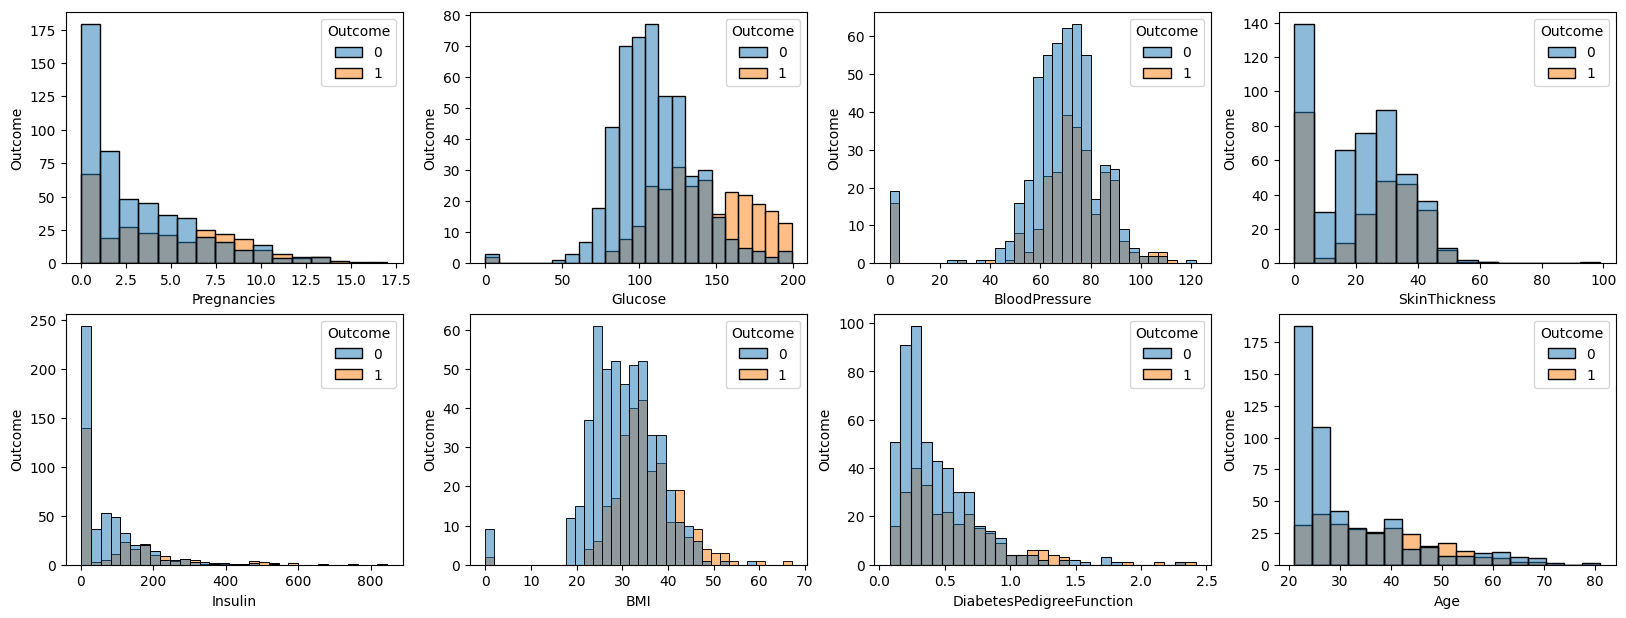

In [19]:
plotnumber=1
featureList=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.figure(figsize=(20,15),facecolor='white')
for i in featureList:
    if(plotnumber<=8):
        plt.subplot(4,4,plotnumber)
        sns.histplot(x=i,data=df,hue='Outcome')
        plt.xlabel(i)
        plt.ylabel('Outcome')
        plotnumber+=1

**Insights:**


1.   Between the age groups 40-55 , people having diabetes outnumbers the non diabetic patients
2.   Skin thickness in diabetic patients outnumbers non-diabetic
patients and is in the range of 43 mm-53 mmc

3.    Diabetes Pedigree Function in diabetic patients outnumbers nondiabetic patients in the range 1-1.5

4.   BloodPressure in diabetes patients outnumbers non-diabetic
patients slightly and is in the range 102-122

5.    Glucose level in diabetes patients outnumbers non-diabetic
patients largely and is in the range 150-200

6.    BMI level in diabetes patients outnumbers non-diabetic patients
slightly and is above 43



In [20]:
df.Glucose.value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

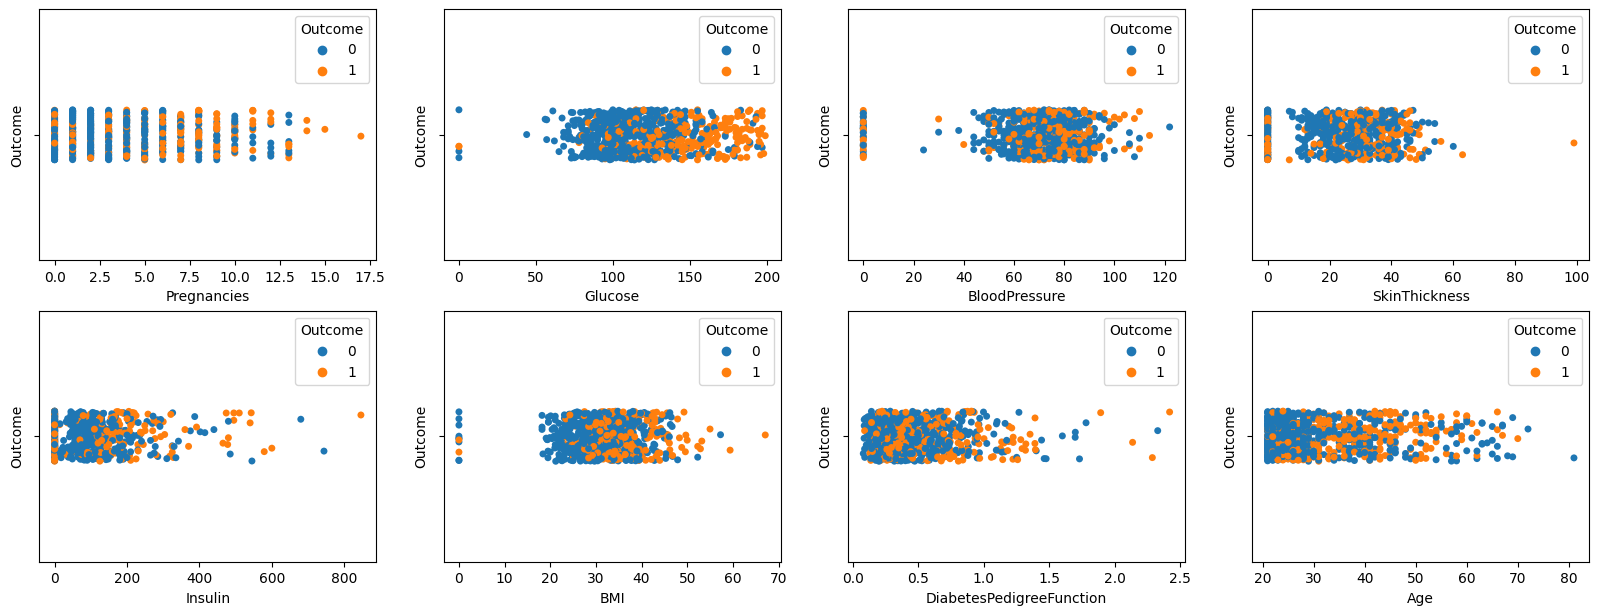

In [22]:
plotnumber=1
featureList=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
plt.figure(figsize=(20,15),facecolor='white')
for i in featureList:
    if(plotnumber<=8):
        plt.subplot(4,4,plotnumber)
        sns.stripplot(x=i,data=df,hue='Outcome')
        plt.xlabel(i)
        plt.ylabel('Outcome')
        plotnumber+=1

Minmax normalization

In [32]:
from sklearn.preprocessing import MinMaxScaler
temp1=['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']
scaling=MinMaxScaler()
df.loc[:,temp1]=scaling.fit_transform(df.loc[:,temp1])

In [33]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.032568,-0.055697,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.032568,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.055697,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.021546,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<Axes: >

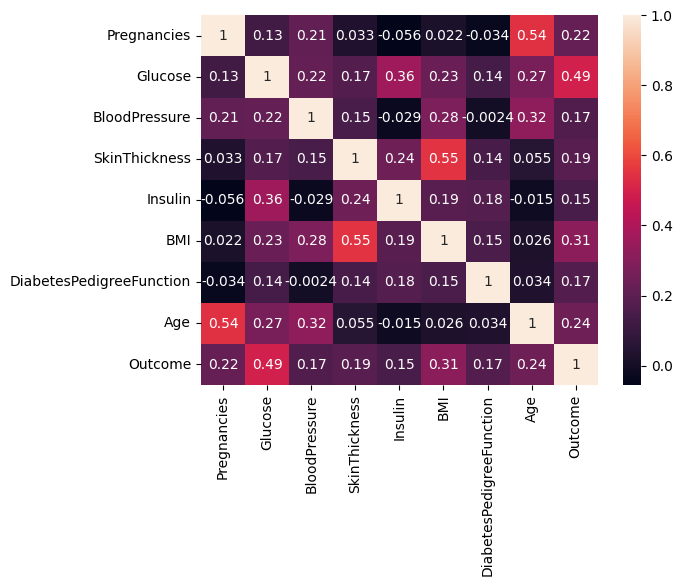

In [34]:
heat=df.corr()
sns.heatmap(heat,annot=True)

**Insights:**


1.   Age and Pregnancies are positively correlated with 0.54
2.   Glucose and outcomes are positively correlated with 0.49
3.   Blood pressure, Diabetes Pedigree Function, Insulin and Skin
Thickness are not correlated with the outcome





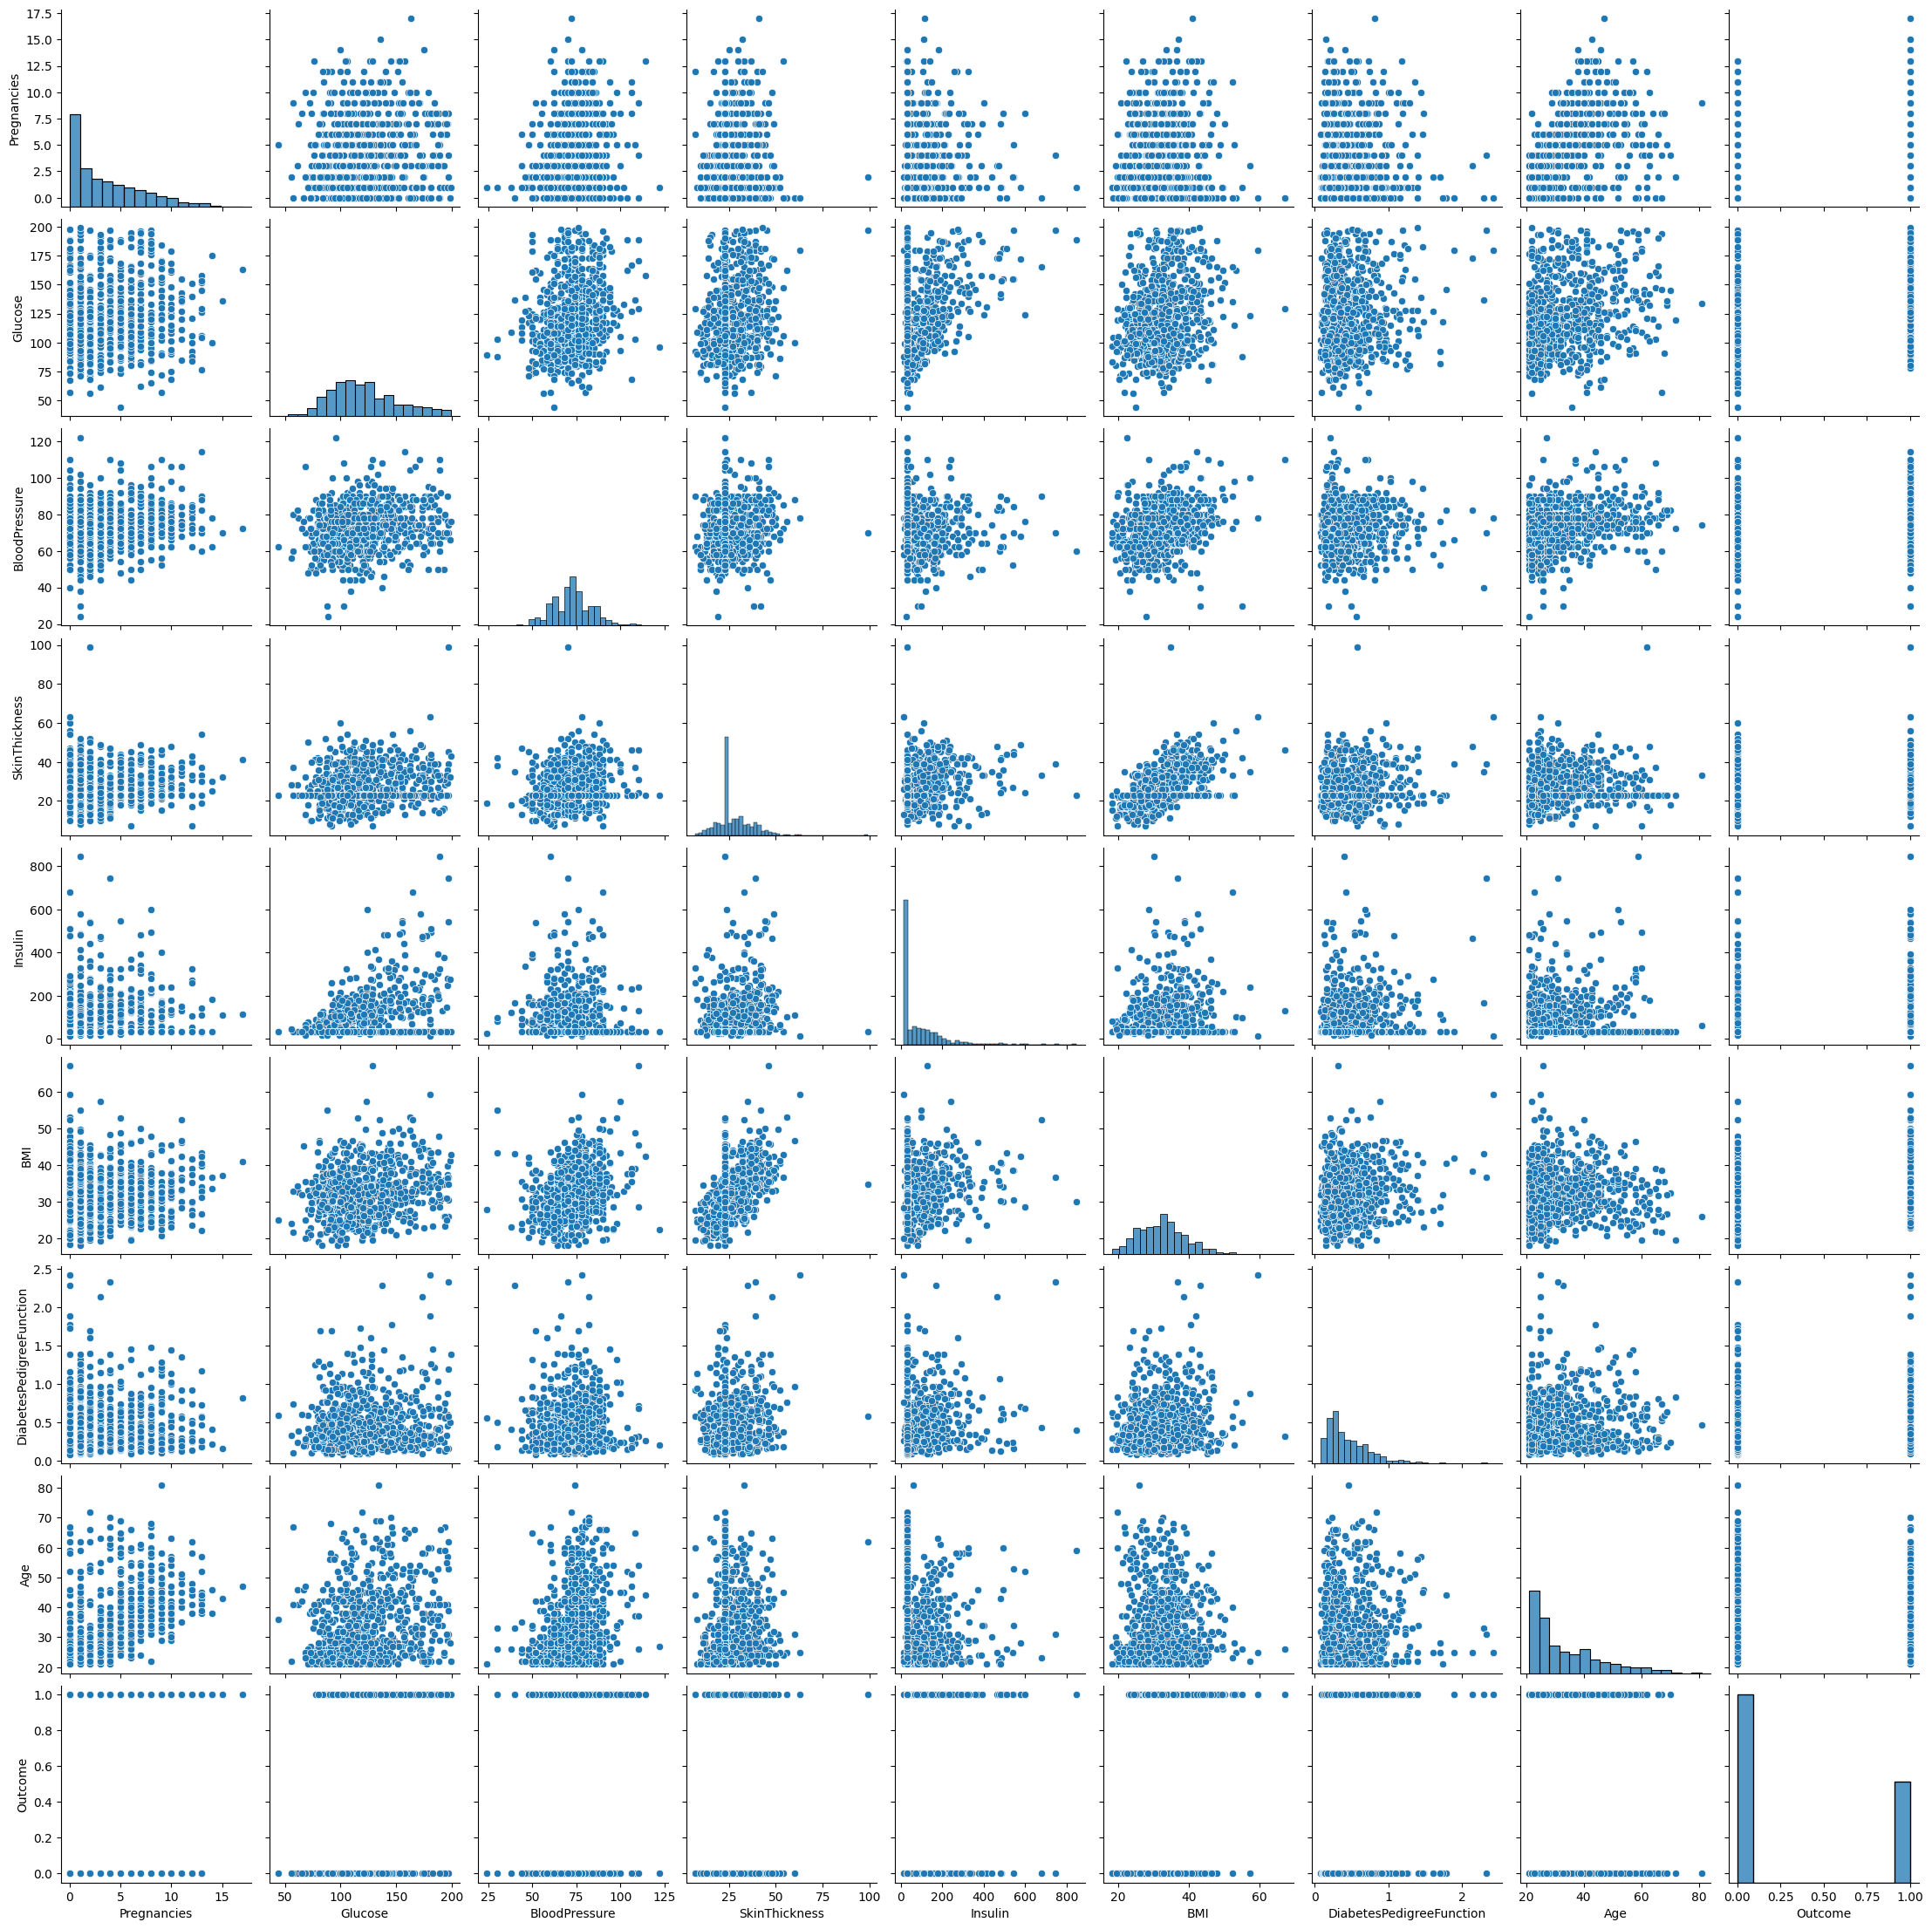

In [31]:
sns.pairplot(df)